In [1]:
!pip install ultralytics kagglehub


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 66.8 MB/s eta 0:00:00


In [2]:
import kagglehub

# Download dataset
path = kagglehub.dataset_download("duydieunguyen/licenseplates")
path


100%|██████████| 959M/959M [00:45<00:00, 22.1MB/s]

Extracting files...


'/root/.cache/kagglehub/datasets/duydieunguyen/licenseplates/versions/1'

In [3]:
import os

for dirpath, dirnames, filenames in os.walk(path):
    print(f"Directory: {dirpath}")
    if dirnames:
        print(f"  Subdirectories: {dirnames}")
    if filenames:
        print(f"  Files: {filenames}")
    print("\n")

Directory: /root/.cache/kagglehub/datasets/duydieunguyen/licenseplates/versions/1
  Subdirectories: ['labels', 'images']
  Files: ['dataset.yaml']


Directory: /root/.cache/kagglehub/datasets/duydieunguyen/licenseplates/versions/1/labels
  Subdirectories: ['train', 'val']


Directory: /root/.cache/kagglehub/datasets/duydieunguyen/licenseplates/versions/1/labels/train
  Files: ['Tgmt_0267.txt', 'greenpack_0254.txt', 'Tgmt_0629.txt', 'greenpack_0500.txt', 'Dieu_0060.txt', 'greenpack_1221.txt', 'greenpack_1705.txt', 'greenpack_1348.txt', 'greenpack_0614.txt', 'Tgmt_0465.txt', 'greenpack_1657.txt', 'Tgmt_0318.txt', 'carlong_0181.txt', 'Tgmt_0776.txt', 'greenpack_0460.txt', 'greenpack_0461.txt', 'greenpack_1409.txt', 'greenpack_0977.txt', 'Dieu_0012.txt', 'greenpack_0315.txt', 'greenpack_0813.txt', 'Hung_0106.txt', 'Tgmt_0846.txt', 'Tgmt_0083.txt', 'Hung_0104.txt', 'greenpack_0252.txt', 'carlong_0962.txt', 'carlong_0790.txt', 'greenpack_1645.txt', 'carlong_0453.txt', 'greenpack_0565.txt', '

Using sample image: /root/.cache/kagglehub/datasets/duydieunguyen/licenseplates/versions/1/images/train/greenpack_1286.png


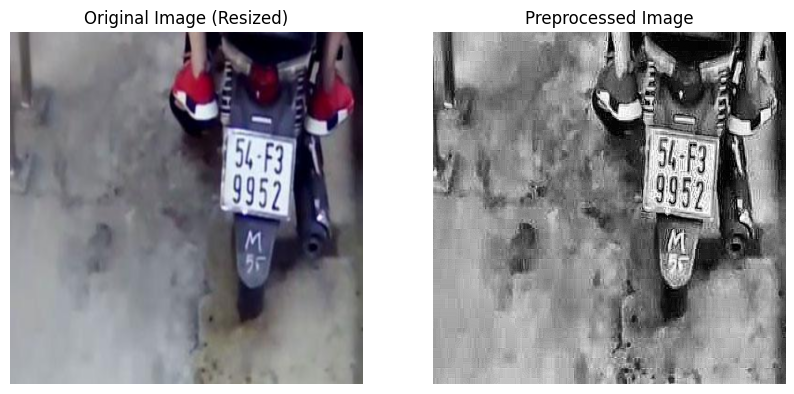

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path, target_size=(640, 640)):
    """
    Performs image preprocessing steps: resize, grayscale, CLAHE, and sharpening.

    Args:
        image_path (str): Path to the input image.
        target_size (tuple): Desired output size (width, height).

    Returns:
        numpy.ndarray: The preprocessed image.
    """
    # Read the image
    img = cv2.imread(image_path)

    if img is None:
        print(f"Error: Could not load image from {image_path}")
        return None

    # 1. Resize image
    img_resized = cv2.resize(img, target_size, interpolation=cv2.INTER_AREA)

    # 2. Convert to grayscale
    gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

    # 3. Increase contrast (CLAHE)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    contrast_enhanced = clahe.apply(gray)

    # 4. Sharpening
    # Define a sharpening kernel
    sharpening_kernel = np.array([[-1, -1, -1],
                                  [-1,  9, -1],
                                  [-1, -1, -1]])
    sharpened_image = cv2.filter2D(contrast_enhanced, -1, sharpening_kernel)

    return sharpened_image

# Example usage (using a placeholder, replace with an actual image path from your dataset if available)
# For demonstration, let's create a dummy image or use a known one if available.
# Assuming 'path' variable from previous cells contains the dataset root
import os

# Try to find a sample image from the dataset
sample_image_path = None
# Construct a potential path to a train image
train_images_path = os.path.join(path, 'images', 'train')
if os.path.exists(train_images_path):
    # Get the first image file found in the train directory
    image_files = [f for f in os.listdir(train_images_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if image_files:
        sample_image_path = os.path.join(train_images_path, image_files[0])

if sample_image_path and os.path.exists(sample_image_path):
    print(f"Using sample image: {sample_image_path}")
    preprocessed_img = preprocess_image(sample_image_path)

    if preprocessed_img is not None:
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        original_img = cv2.imread(sample_image_path)
        plt.imshow(cv2.cvtColor(cv2.resize(original_img, (640,640)), cv2.COLOR_BGR2RGB)) # Display original resized for comparison
        plt.title('Original Image (Resized)')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(preprocessed_img, cmap='gray')
        plt.title('Preprocessed Image')
        plt.axis('off')
        plt.show()
else:
    print("No sample image found to demonstrate preprocessing. Please provide a valid image path.")
    print(f"Searched in: {train_images_path} and found files: {image_files if 'image_files' in locals() else 'None'}")